# Recipe Site Traffic Prediction

In [20]:
# importing the data
import pandas as pd
import numpy as np
df = pd.read_csv('recipe_site_traffic_2212.csv')

# check for missing data
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [21]:
# replacing missing values

mean_value = df['calories'].mean()
df['calories'].fillna(mean_value, inplace=True)
df['calories'] = df['calories'].astype(float).round(2)

mean_value = df['carbohydrate'].mean()
df['carbohydrate'].fillna(mean_value, inplace=True)
df['carbohydrate'] = df['carbohydrate'].astype(float).round(2)

mean_value = df['sugar'].mean()
df['sugar'].fillna(mean_value, inplace=True)
df['sugar'] = df['sugar'].astype(float).round(2)

mean_value = df['protein'].mean()
df['protein'].fillna(mean_value, inplace=True)
df['protein'] = df['protein'].astype(float).round(2)
df


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.94,35.07,9.05,24.15,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,435.94,35.07,9.05,24.15,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


In [23]:
# cleaning the data

df['category'].unique()
df['category'].replace({'Chicken Breast': 'Chicken'}, inplace=True)

df['servings'].unique()
df['servings'].replace({'4 as a snack': '4', '6 as a snack': '6'}, inplace=True)
df['servings'] = df['servings'].astype(int)

df['high_traffic'].unique()
df['high_traffic'].fillna("Low", inplace=True)
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.94,35.07,9.05,24.15,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,Low
943,944,435.94,35.07,9.05,24.15,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


# Data Validation

The data set has 947 rows, 8 columns. I have validated all variables and I have made several changes after validation.

recipe: 947 unique identifiers without missing values. No transformation was carried out on the column

calories: this column contains 52 missing values which was replaced by the mean value and rounded up to 2 decimal places

carbohydrate: this column contains 52 missing values which was replaced by the mean value and rounded up to 2 decimal places

sugar: this column contains 52 missing values which was replaced by the mean value and rounded up to 2 decimal places

protein: this column contains 52 missing values which was replaced by the mean value and rounded up to 2 decimal places

category: this column contains 10 unique type of recipe described in the data sheet. However, the column also contains 'Chicken Breast' which was changed to 'Chicken' for uniformity and to comply with the data description.

servings: this column coontains two extra values ('4 as a snack' and '6 as a snack') in addition to the four unique values describe in the data description. However, '4 as a snack' and '6 as a snack' was replaced with 4 and 6 respectively and the column type was changed to integer.

high_traffic: the column contains 373 null values that was replaced with "Low", the only alternative to "High"

# Exploratory Analysis

## Traffic category by recipe

60.61% of the recipes generated high traffic while 39.39% accounted for low traffic as shown below

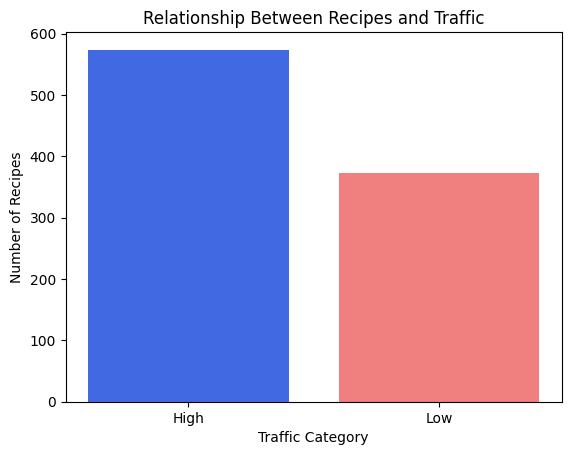

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of recipes in each traffic category
traffic_counts = df['high_traffic'].value_counts()

# Create a bar chart
plt.bar(traffic_counts.index, traffic_counts.values, color=['royalblue', 'lightcoral'])
plt.xlabel('Traffic Category')
plt.ylabel('Number of Recipes')
plt.title('Relationship Between Recipes and Traffic')
plt.show()

## Servings by traffic rating

The number of high traffic for each of the servings is more that that of the low traffic. The most numerous high traffic was observed in servings 4.

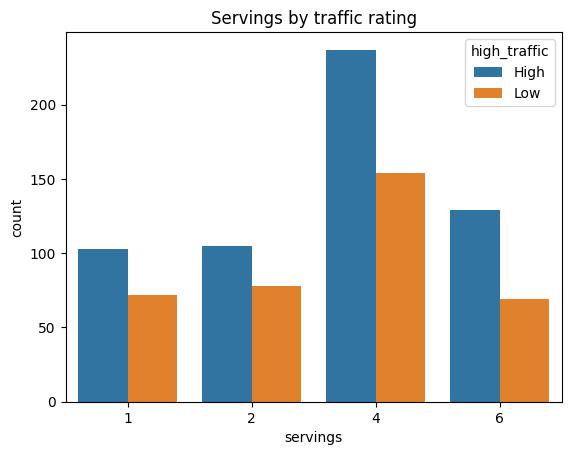

In [17]:
import seaborn as sns
sns.countplot(df, x="servings", hue="high_traffic")
plt.title('Servings by traffic rating')
plt.show()


## Distribution of recipe category

The chicken recipe accounted for approximately 18.2% of the total recipe, followed by the breakfast category (11.2%). Other categories of recipe accounted for between 7.5% and 9.7% of the overall recipe.

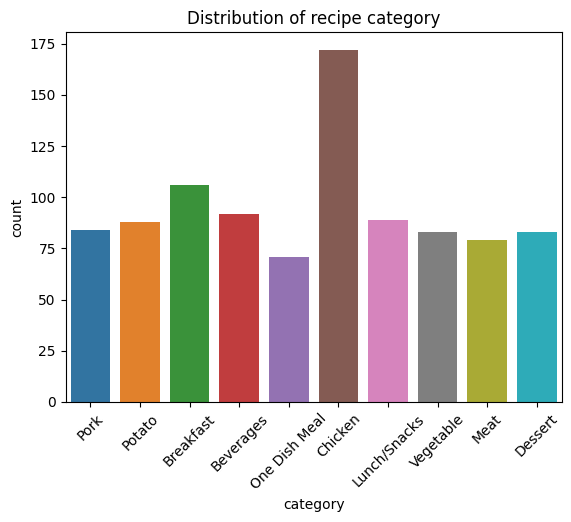

In [13]:
sns.countplot(df, x="category")
plt.xticks(rotation=45)
plt.title('Distribution of recipe category')
plt.show()

## Distribution of High Traffic and Low Traffic Recipes by Category

Pork, potato and vegetable categories have more recipes with high traffic accounting for 13.14%, 14.5% and 14.3% of the overall high traffic respectively. Beverages, breakfast and chicken, categories have more recipes with low traffic accounting for 23.3%, 19.6%, and 26.5% of the overall low traffic respectively.

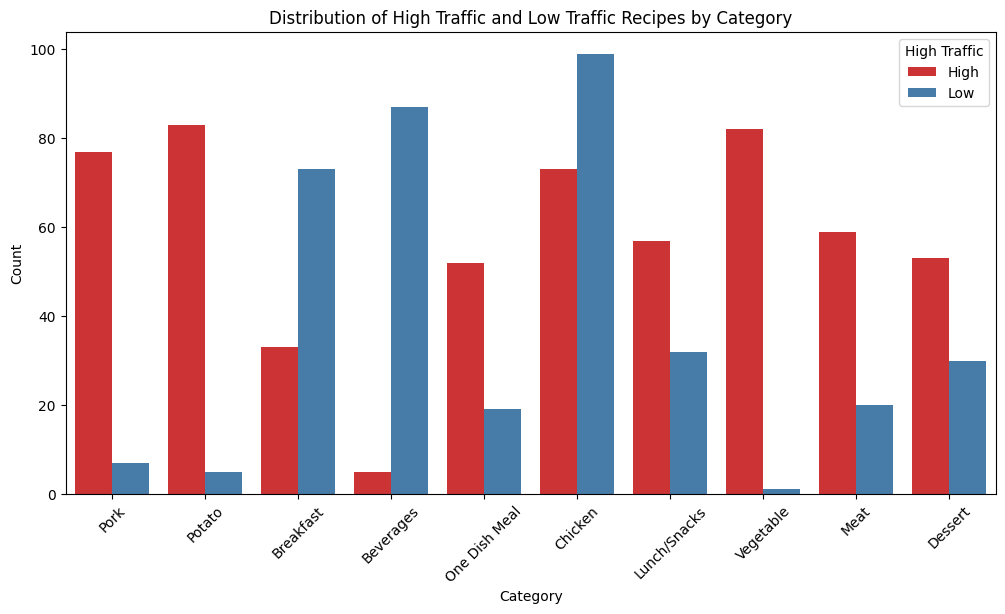

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category', hue='high_traffic', palette='Set1')
plt.xticks(rotation=45)  
plt.title('Distribution of High Traffic and Low Traffic Recipes by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='High Traffic', loc='upper right')
plt.show()

## Heatmap of Numeric variables

The heatmap shows a moderate linear negative relationship among the 5 variables - calories, carbohydrate, sugar, protein, and servings. All values are close to 0, signifying that they are weakly connected.

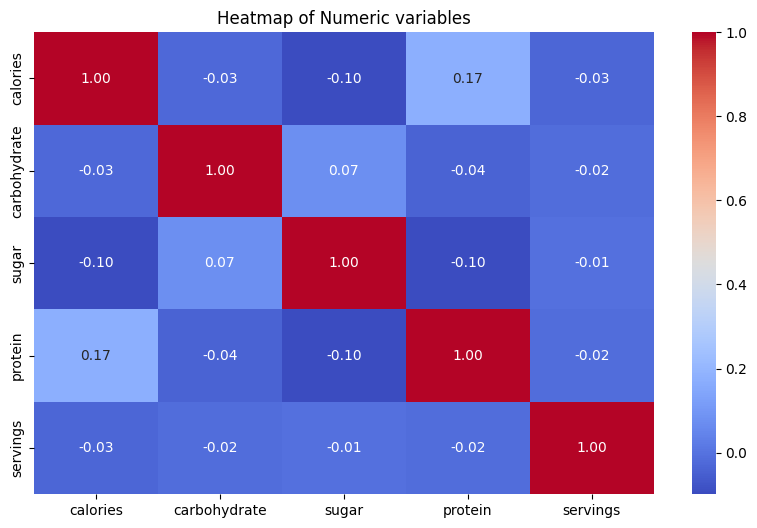

In [18]:
dfm = df[['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings']]

# Calculate the correlation matrix
corr_matrix = dfm.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap of Numeric variables')
plt.show()

# Model Development 

Predicting the high_traffic is a binary classification problem in machine learning. Therefore I am choosing Logistic Regression and Random Forest model as comparison model.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
df['high_traffic'] = label_encoder.fit_transform(df['high_traffic'])

# Define the features (X) and target variable (y)
X = df[['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'category']]
y = df['high_traffic']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)

# Train and evaluate Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)

# Compare performance metrics
print("Logistic Regression:")
print("Accuracy:", logistic_accuracy)
print("Classification Report:")
print(classification_report(y_test, logistic_y_pred, target_names=['High', 'Low']))

print("\nRandom Forest:")
print("Accuracy:", random_forest_accuracy)
print("Classification Report:")
print(classification_report(y_test, random_forest_y_pred, target_names=['High', 'Low']))


Logistic Regression:
Accuracy: 0.7473684210526316
Classification Report:
              precision    recall  f1-score   support

        High       0.80      0.77      0.78       113
         Low       0.68      0.71      0.70        77

    accuracy                           0.75       190
   macro avg       0.74      0.74      0.74       190
weighted avg       0.75      0.75      0.75       190


Random Forest:
Accuracy: 0.7368421052631579
Classification Report:
              precision    recall  f1-score   support

        High       0.74      0.86      0.80       113
         Low       0.73      0.56      0.63        77

    accuracy                           0.74       190
   macro avg       0.73      0.71      0.71       190
weighted avg       0.74      0.74      0.73       190



# Model Evaluation

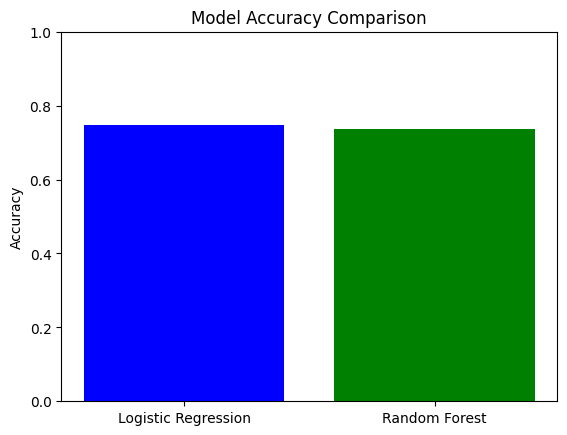

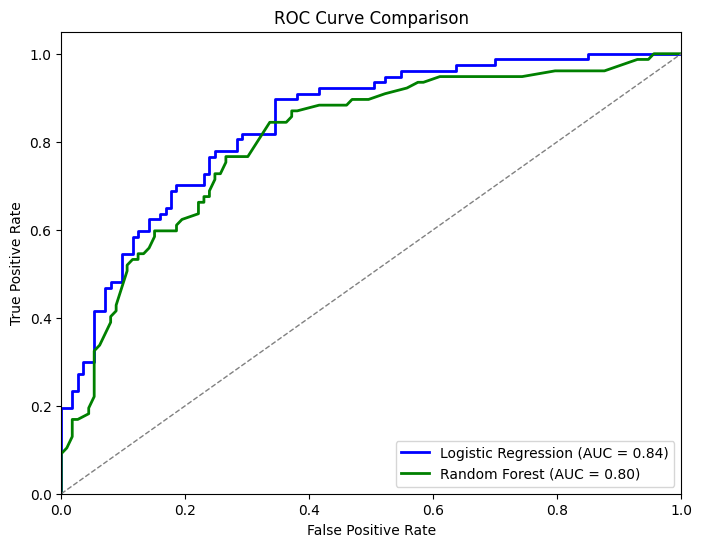

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Encode categorical variables
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
df['high_traffic'] = label_encoder.fit_transform(df['high_traffic'])

# Define the features (X) and target variable (y)
X = df[['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'category']]
y = df['high_traffic']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)

# Train Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(X_test)

# Calculate accuracy for both models
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)

# Create a bar chart to compare accuracy
models = ['Logistic Regression', 'Random Forest']
accuracies = [logistic_accuracy, random_forest_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

# Create ROC curve for both models
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

logistic_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
random_forest_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot(random_forest_fpr, random_forest_tpr, color='green', lw=2, label=f'Random Forest (AUC = {random_forest_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


### Model Comparison

Based on the results obtained both models have comparable accuracy. However the logistic regression model had a slightly higher precision and AUC compared to random forest.

# Business Metric

Since the objective of the business is to predict recipes that will generate high traffic and to predict high traffic recipes 80% of the time, I will recommend we use the logistic regression model generated to monitor the recipes for high traffic over a six month period as it can predict more true high traffic recipe.

In [24]:
#To test the prediction system

n = 9  # n = 0, ..., len(X_test)
X_new = X_test.iloc[[n]]
y_pred_new = logistic_model.predict(X_new)

if y_pred_new[0] == 1:
    print('The traffic is high')
else:
    print('The traffic is not high')

The traffic is high


# Recommendation

Based on the available data and analysis carried out, I will recommend the following;

To deploy the logistic regression model which can predict real traffic with 80% precision. Also, constantly audit the model artifacts and reiterating to check if the model is making reasonable predictions.

To obtain more data such as nutritional value, cost, duration spent on site, geographical location of traffics, combination of recipes users visited at the same session to help build a more robust model.

To conduct google keyword search in order to know the popular recipe consumers are looking for to replace low traffic recipes.

To embark on ads campaign on social media and elso employ the services of brand influencers

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation